# Findabetes model

* Dataset: CDC Diabetes Health Indicators

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)



{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
X.describe()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
X.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [7]:
y.isna().sum()

Diabetes_binary    0
dtype: int64

In [8]:
X.isna().sum()



HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Feature selection

**Features that are less relevant for a Swedish context**

* AnyHealthcare - in most Swedish regions, all patients listed at a primary health clinic will be covered by subsidised healthcare. This project will take placce in Stockholm, where you have to be folkbokförd to belong to a primary clinic[1], meaning all patients at the clinic are eligable for subsidised health care [2].
* NoDocbcCost - Same reasoning as above
* Income - may not be irrelevant, but would need to be adapted to a Swedish context. It is likely that the correlation between income level and diabetes risk is not the same in Sweden as in the United States. Since this dataset reflects U.S. income thresholds, the feature is not directly relevant for our population and should therefore be excluded unless it can be replaced with a more context-appropriate measure.
* Education - same reasoning as above.

**Features where the patient is unlikely to know the answer**
* HighChol - need access to lab results/knowledge about results.
* CholCheck - All patients may not be aware of whether or not their cholesterol has been tested or when it was done most recently.
* BMI - should not be excluded, but the patient may not be aware of their BMI, and it may be useful to add a bmi-calculator to the dashboard.


In [9]:
X = X.drop(columns=['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education', 'HighChol', 'CholCheck'])
X.head()

,HighBP,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
2,1,28,0,0,0,0,1,0,0,5,30,30,1,0,9
3,1,27,0,0,0,1,1,1,0,2,0,0,0,0,11
4,1,24,0,0,0,1,1,1,0,2,3,0,0,0,11


# EDA

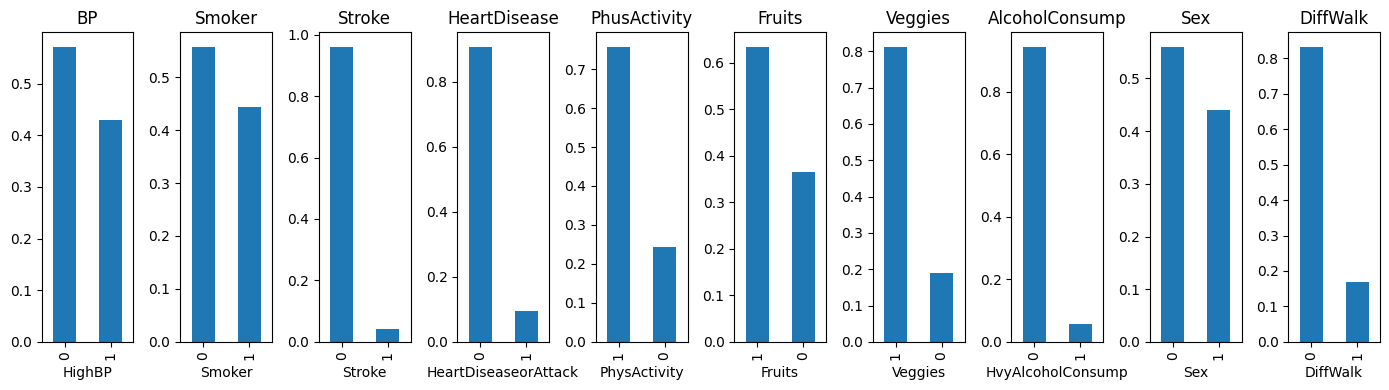

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize=(14,4))

X["HighBP"].value_counts(normalize=True).plot(kind="bar", ax=ax1, title="BP")
X["Smoker"].value_counts(normalize=True).plot(kind="bar", ax=ax2, title="Smoker")
X['Stroke'].value_counts(normalize=True).plot(kind="bar", ax=ax3, title="Stroke")
X['HeartDiseaseorAttack'].value_counts(normalize=True).plot(kind="bar", ax=ax4, title="HeartDisease")
X['PhysActivity'].value_counts(normalize=True).plot(kind="bar", ax=ax5, title="PhusActivity")
X['Fruits'].value_counts(normalize=True).plot(kind="bar", ax=ax6, title="Fruits")
X['Veggies'].value_counts(normalize=True).plot(kind="bar", ax=ax7, title="Veggies")
X['HvyAlcoholConsump'].value_counts(normalize=True).plot(kind="bar", ax=ax8, title="AlcoholConsump")
X['Sex'].value_counts(normalize=True).plot(kind="bar", ax=ax9, title="Sex")
X['DiffWalk'].value_counts(normalize=True).plot(kind="bar", ax=ax10, title="DiffWalk")

plt.tight_layout()
plt.show()

In [11]:
pd.crosstab(X["PhysActivity"], X["DiffWalk"], normalize="index")

DiffWalk,0,1
PhysActivity,,
0,0.664832,0.335168
1,0.885499,0.114501


## Featues to consdier

**Fruits, Greens, PhysActivity**

The timing of data collection is not clearly specified. It is plausible that individuals who have lived with a diabetes diagnosis for some time may have already adjusted their diet and increased their consumption of fruits and vegetables. If so, this feature could misleadingly suggest a stronger association between green consumption and diabetes than what actually exists, thereby risking bias in the model.

**Difficilty walking**

Only 11% of those with difficulty walking are physically active. Maybe this feature does not add a lot of new info? The relevance it has on diabetes is probably linked to lower physical activity, which means it is covered by that feature anyway. Then again, it may contain people that have difficulty walking *because* of their diabetes, e.g., becuause of neuropathy, which means it may be a usesful indicator on its own. 

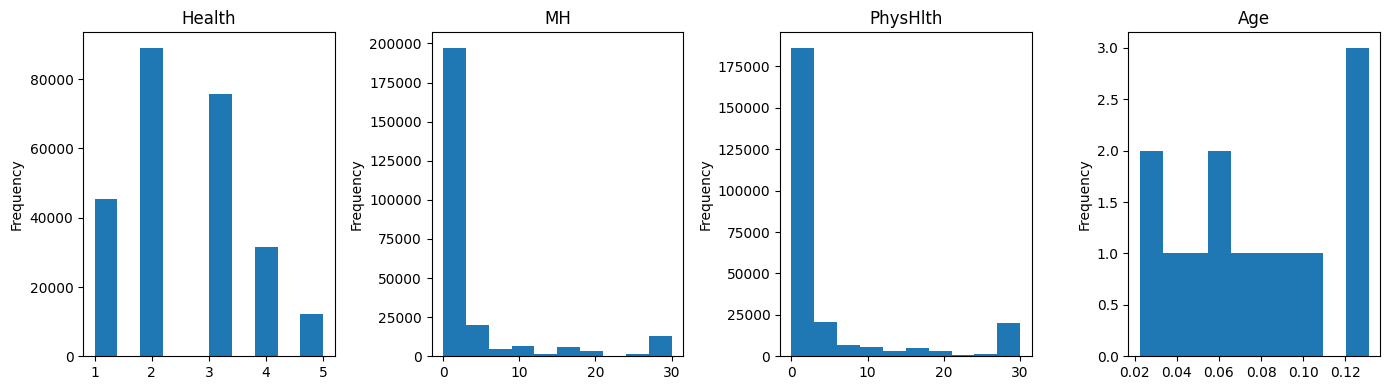

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,4))

X["GenHlth"].plot(kind="hist", ax=ax1, title="Health")
X["MentHlth"].plot(kind="hist", ax=ax2, title="MH")
X['PhysHlth'].plot(kind="hist", ax=ax3, title="PhysHlth")
X['Age'].value_counts(normalize=True).plot(kind="hist", ax=ax4, title="Age")

plt.tight_layout()
plt.show()

<Axes: >

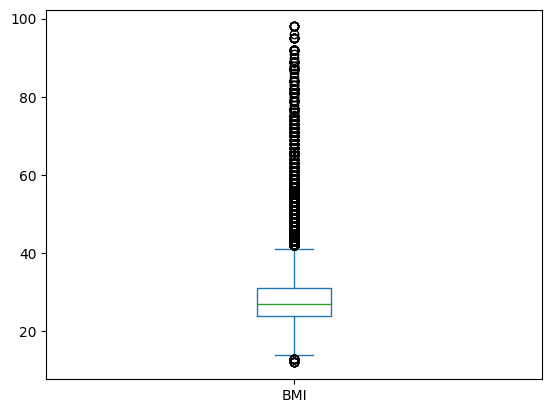

In [13]:
X['BMI'].plot(kind="box")

BMI contains a lot of extremely high outliers. Since these values increase in a continuous manner rather than appearing as obvious errors, they are retained in the dataset as it is hard to use the data to draw a clear line as to where these extreme values become unrealistic, and excluding them carries the risk of loosing clinically relevant data. 

<Axes: title={'center': 'Diabetes'}, xlabel='Diabetes_binary'>

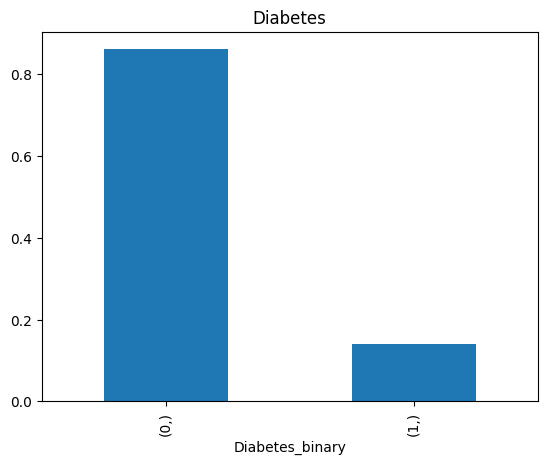

In [14]:
y.value_counts(normalize=True).plot(kind="bar", title="Diabetes")

# Model

In [15]:
X = X.to_numpy()
y = y.to_numpy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# References

1. https://www.1177.se/Stockholm/sa-fungerar-varden/att-valja-vardmottagning/valja-vardmottagning/om-listning-och-avlistning/
2. https://www.informationsverige.se/sv/jag-har-fatt-uppehallstillstand/om-du-behover-vard.html/
